# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 632


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?"
unit = 'imperial'
city_url = f"{url}appid={weather_api_key}&q={city}&units={unit}" # YOUR CODE HERE
cityJSON = requests.get(city_url).json()
from pprint import pprint
pprint(cityJSON)

{'base': 'stations',
 'clouds': {'all': 49},
 'cod': 200,
 'coord': {'lat': 40.8108, 'lon': 69.1986},
 'dt': 1717343139,
 'id': 1514330,
 'main': {'feels_like': 76.42,
          'grnd_level': 973,
          'humidity': 29,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 77.59,
          'temp_max': 77.59,
          'temp_min': 77.59},
 'name': 'Bo`ka',
 'sys': {'country': 'UZ', 'sunrise': 1717286021, 'sunset': 1717339745},
 'timezone': 18000,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 22, 'gust': 10.89, 'speed': 7.96}}


In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?" 
# units being measured in Ferenheight F*
unit = 'imperial'
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={unit}" # YOUR CODE HERE
    cityJSON = requests.get(city_url).json()
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = cityJSON['name']# YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = cityJSON['coord']['lat']# YOUR CODE HERE
        city_lng = cityJSON['coord']['lon']# YOUR CODE HERE
        city_max_temp = cityJSON['main']['temp_max']# YOUR CODE HERE
        city_humidity = cityJSON['main']['humidity']# YOUR CODE HERE
        city_clouds = cityJSON['clouds']['all']# YOUR CODE HERE
        city_wind = cityJSON['wind']['speed']# YOUR CODE HERE
        city_country = cityJSON['sys']['country']# YOUR CODE HERE
        city_date = cityJSON['dt']# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lagos
Processing Record 2 of Set 1 | apolinario saravia
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | port lincoln
Processing Record 5 of Set 1 | talnakh
Processing Record 6 of Set 1 | ataq
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | college
Processing Record 11 of Set 1 | kingston
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | mokhsogollokh
Processing Record 15 of Set 1 | malmyzh
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | tulun
Processing Record 19 of Set 1 | bowen
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | west island
Processing Record 22 of Set 1 | wuwei
Processing Record 23 of Set 1 

Processing Record 43 of Set 4 | lhokseumawe
Processing Record 44 of Set 4 | flying fish cove
Processing Record 45 of Set 4 | kargasok
Processing Record 46 of Set 4 | lockwood
Processing Record 47 of Set 4 | uzgen
Processing Record 48 of Set 4 | twardogora
Processing Record 49 of Set 4 | alice springs
Processing Record 0 of Set 5 | rundu
Processing Record 1 of Set 5 | burang
Processing Record 2 of Set 5 | sisimiut
Processing Record 3 of Set 5 | ancud
Processing Record 4 of Set 5 | afaahiti
Processing Record 5 of Set 5 | nasiriyah
Processing Record 6 of Set 5 | karymskoye
Processing Record 7 of Set 5 | dudinka
Processing Record 8 of Set 5 | massawa
Processing Record 9 of Set 5 | saint-leu
Processing Record 10 of Set 5 | pandan
Processing Record 11 of Set 5 | mangalia
Processing Record 12 of Set 5 | el calafate
Processing Record 13 of Set 5 | cockburn town
Processing Record 14 of Set 5 | sur
Processing Record 15 of Set 5 | arawa
Processing Record 16 of Set 5 | manaure
Processing Record 17

Processing Record 36 of Set 8 | uturoa
Processing Record 37 of Set 8 | kalevala
Processing Record 38 of Set 8 | khovd
Processing Record 39 of Set 8 | sao jose da coroa grande
Processing Record 40 of Set 8 | malinyi
Processing Record 41 of Set 8 | aleg
Processing Record 42 of Set 8 | acajutla
Processing Record 43 of Set 8 | zierikzee
Processing Record 44 of Set 8 | chui
Processing Record 45 of Set 8 | homer
Processing Record 46 of Set 8 | westport
Processing Record 47 of Set 8 | zhalantun
Processing Record 48 of Set 8 | kathmandu
Processing Record 49 of Set 8 | dalnerechensk
Processing Record 0 of Set 9 | jose bonifacio
Processing Record 1 of Set 9 | saldanha
Processing Record 2 of Set 9 | le morne-rouge
Processing Record 3 of Set 9 | kuala lipis
Processing Record 4 of Set 9 | lazaro cardenas
Processing Record 5 of Set 9 | nova vicosa
Processing Record 6 of Set 9 | paranhos
Processing Record 7 of Set 9 | tupiza
Processing Record 8 of Set 9 | holualoa
Processing Record 9 of Set 9 | oruro

Processing Record 25 of Set 12 | camayenne
Processing Record 26 of Set 12 | tchintabaraden
Processing Record 27 of Set 12 | dawesville
Processing Record 28 of Set 12 | severnoye
Processing Record 29 of Set 12 | tsiombe
Processing Record 30 of Set 12 | peruibe
Processing Record 31 of Set 12 | coahuayana de hidalgo
Processing Record 32 of Set 12 | vernio
Processing Record 33 of Set 12 | as sulayyil
Processing Record 34 of Set 12 | mwene-ditu
Processing Record 35 of Set 12 | kone
Processing Record 36 of Set 12 | mossel bay
Processing Record 37 of Set 12 | grande prairie
Processing Record 38 of Set 12 | northwood
Processing Record 39 of Set 12 | lompoc
Processing Record 40 of Set 12 | ulan bator
Processing Record 41 of Set 12 | cannonvale
Processing Record 42 of Set 12 | rethymno
Processing Record 43 of Set 12 | la union
Processing Record 44 of Set 12 | senanga
Processing Record 45 of Set 12 | mirpur sakro
Processing Record 46 of Set 12 | santiago de cao
Processing Record 47 of Set 12 | ya

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          610
Lat           610
Lng           610
Max Temp      610
Humidity      610
Cloudiness    610
Wind Speed    610
Country       610
Date          610
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lagos,6.5833,3.7500,82.72,85,100,4.43,NG,1717343085
1,apolinario saravia,-24.4328,-63.9954,78.17,45,0,8.12,AR,1717343158
2,grytviken,-54.2811,-36.5092,27.70,74,68,1.66,GS,1717343159
3,port lincoln,-34.7333,135.8667,53.19,53,100,12.55,AU,1717343054
4,talnakh,69.4865,88.3972,34.21,99,100,2.93,RU,1717343161


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lagos,6.5833,3.7500,82.72,85,100,4.43,NG,1717343085
1,apolinario saravia,-24.4328,-63.9954,78.17,45,0,8.12,AR,1717343158
2,grytviken,-54.2811,-36.5092,27.70,74,68,1.66,GS,1717343159
3,port lincoln,-34.7333,135.8667,53.19,53,100,12.55,AU,1717343054
4,talnakh,69.4865,88.3972,34.21,99,100,2.93,RU,1717343161


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

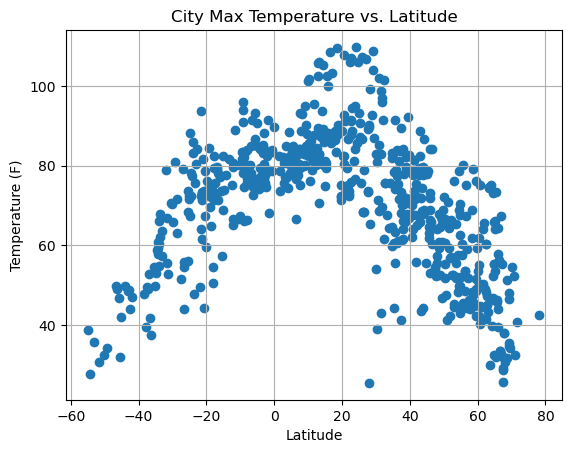

In [10]:
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('City Max Temperature vs. Latitude')
plt.grid()

plt.savefig("output_data/Fig1.png")

plt.show()

#### Latitude Vs. Humidity

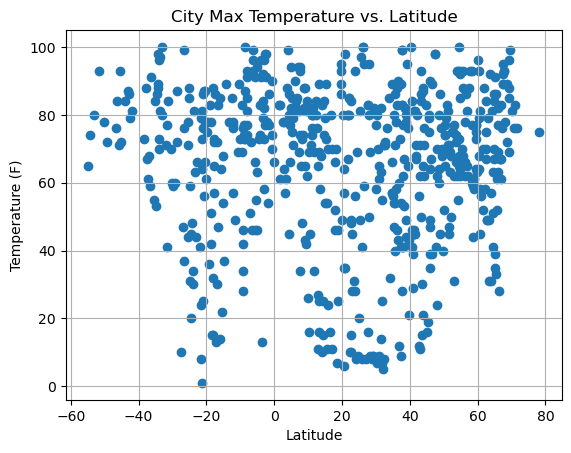

In [11]:
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('City Max Temperature vs. Latitude')
plt.grid()

plt.savefig("output_data/Fig2.png")

plt.show()

#### Latitude Vs. Cloudiness

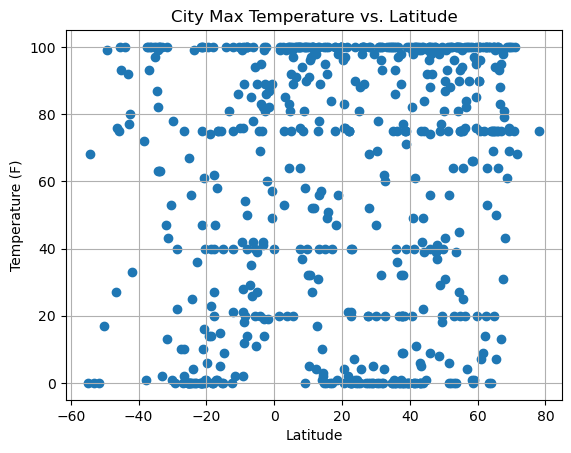

In [12]:
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('City Max Temperature vs. Latitude')
plt.grid()

plt.savefig("output_data/Fig3.png")

plt.show()

#### Latitude vs. Wind Speed Plot

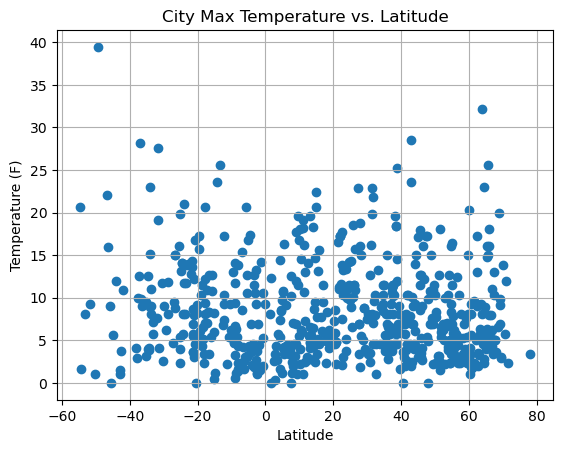

In [13]:
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('City Max Temperature vs. Latitude')
plt.grid()

plt.savefig("output_data/Fig4.png")

plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title, text_coordinates, color):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values, color = color, edgecolor="black",s=50)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lagos,6.5833,3.7500,82.72,85,100,4.43,NG,1717343085
4,talnakh,69.4865,88.3972,34.21,99,100,2.93,RU,1717343161
5,ataq,14.5377,46.8319,89.19,25,2,14.72,YE,1717343162
8,jamestown,42.0970,-79.2353,65.01,80,100,10.36,US,1717343031
9,college,64.8569,-147.8028,55.45,70,100,5.75,US,1717343165


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,apolinario saravia,-24.4328,-63.9954,78.17,45,0,8.12,AR,1717343158
2,grytviken,-54.2811,-36.5092,27.70,74,68,1.66,GS,1717343159
3,port lincoln,-34.7333,135.8667,53.19,53,100,12.55,AU,1717343054
6,margaret river,-33.9500,115.0667,60.40,70,63,15.17,AU,1717343163
7,avarua,-21.2078,-159.7750,73.45,64,100,5.75,CK,1717343163


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.63674800801735


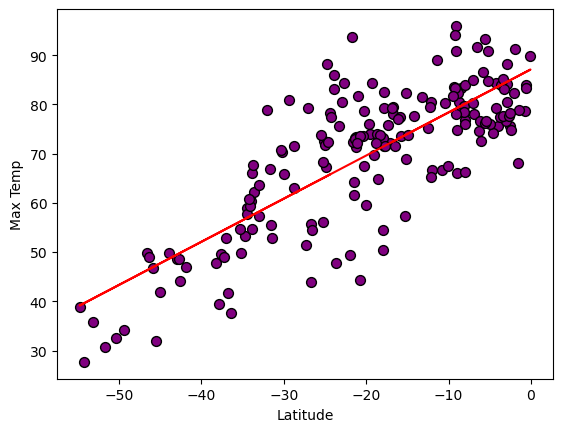

In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, "Max Temp", (6,-10), "purple")

The r-value is: 0.63674800801735


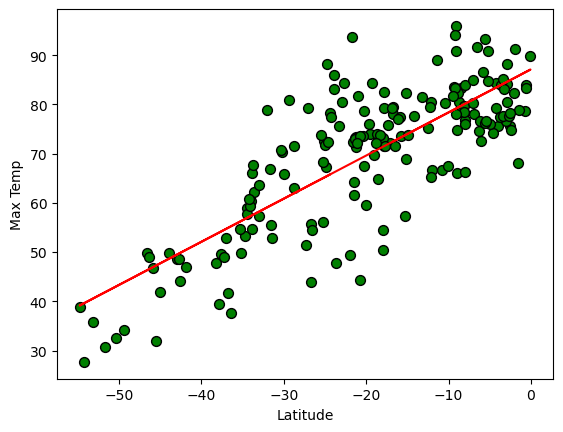

In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, "Max Temp", (6,-10), "green")

**Discussion about the linear relationship:** The closer you get to the equator the higher the max temperature gets. Same thing in opposition the farther away from the equator the lower the max temp gets. Also the higher the r-value gets the stronger of a correlation we have between latitude and max temp.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.00040794559609701257


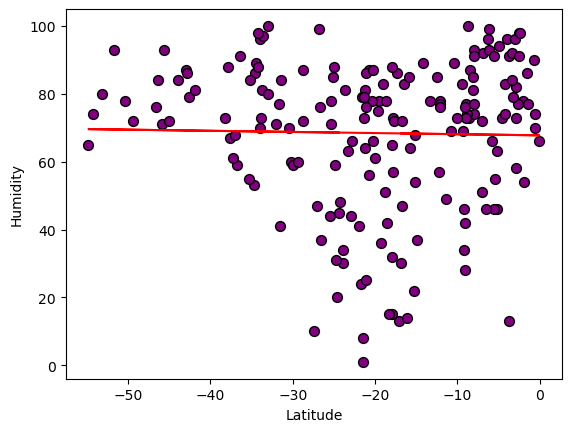

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values, "Humidity", (50,18), "purple")

The r-value is: 0.00040794559609701257


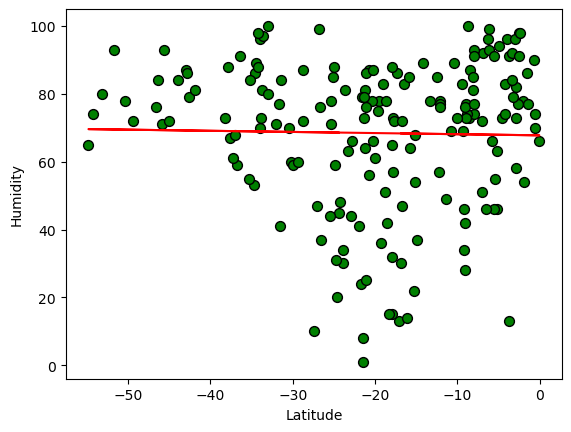

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values, "Humidity", (50,18), "green")

**Discussion about the linear relationship:** Not a very strong correlation between latitude and humidity it looks flat and stagnant.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 1.3235898784839674e-05


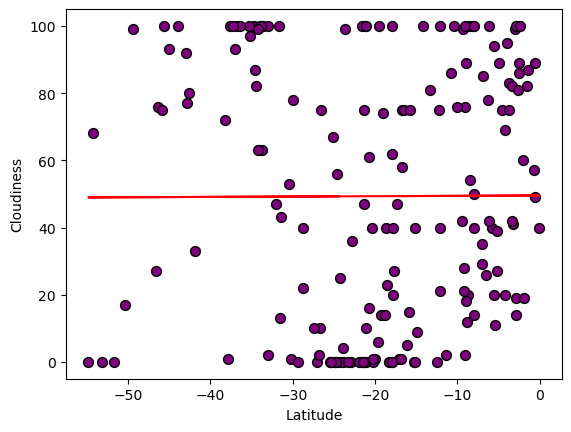

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values, "Cloudiness", (50,50), "purple")

The r-value is: 1.3235898784839674e-05


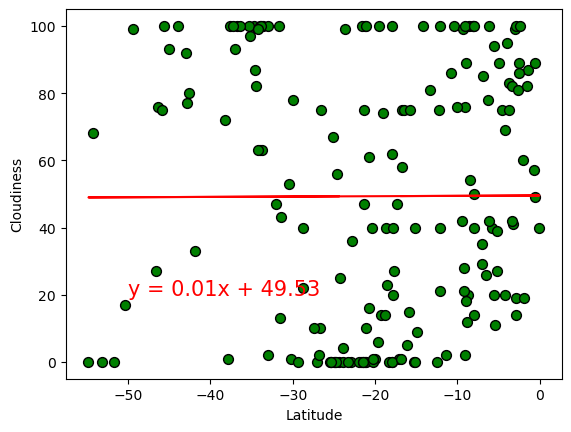

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values, "Cloudiness", (-50,20), "green")

**Discussion about the linear relationship:** No relationship between cloudiness and latitude

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04473884216628959


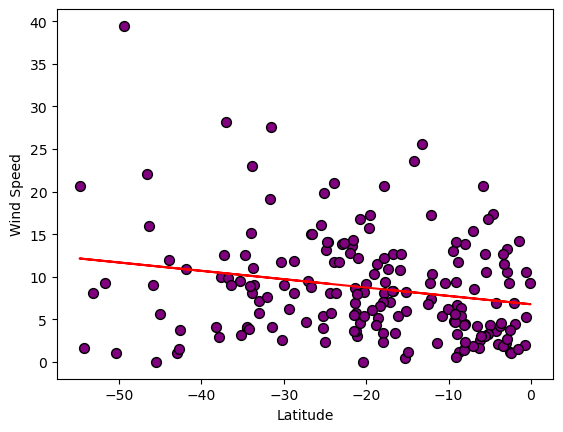

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values, "Wind Speed", (50,35), "purple")

The r-value is: 0.04473884216628959


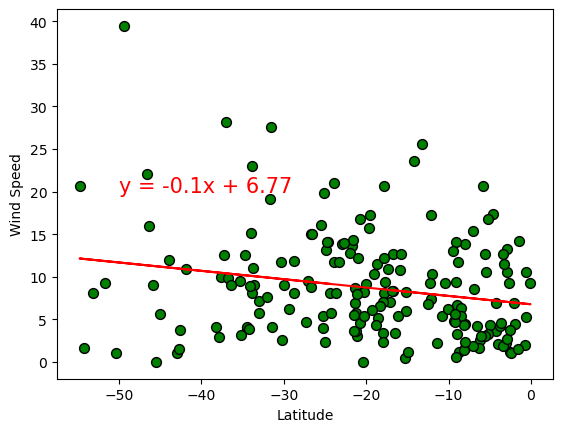

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values, "Wind Speed", (-50,20), "green")

**Discussion about the linear relationship:** Weak correlation but stronger than some other categories